In [3]:
######## Rahul Kumar ########
import numpy as np # import numpy module 
import pandas as pd  # import pandas module 
import matplotlib.pyplot as plt  #import plotting library matplotlib 
import seaborn as sns  # import seaborn library for visualization
%matplotlib inline

In [76]:
df=pd.read_csv('Company Dataset.csv')   # using pandas reading csv file and storing into df dataframe

# Count the number of rows and columns:

In [9]:
# to find the rows and columns using shape function 
df.shape  

(7043, 21)

In [11]:
 # columns rows 7043 and columns 21 
# beginning the cleaning of data which means spotting the missing data in the dataset 
df.isna().sum()  # to check feature/column wise


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Since machine can only understand numbers, we begin Feature Engineering:
# Checking the count on Churn:

In [16]:
# since it is coming 0 therefore there is no missing values in the dataset 'Comnpany Dataset' 

#now we will filter out the churn values and count them

df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [19]:
column_df=[] # a list
columns=df.columns # all the columns present are stored into columns resepectively 

for col in columns:  # loop to store all the terms
    if df[col].value_counts().shape[0]==2:
        column_df.append(col)  # columns having only two values are appended to the column_df list

In [20]:
column_df  # a list containing all the features, which contains only two values

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [31]:
columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [34]:
column_df1=['customerID','tenure','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod','MonthlyCharges','TotalCharges']

In [39]:
print("LIST 1:",column_df)  # list with columns having exactly 2 values
print("LIST 2:",column_df1)   # list having columns with less than or more than 2 values

LIST 1: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
LIST 2: ['customerID', 'tenure', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rahul\anaconda3\lib\si

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

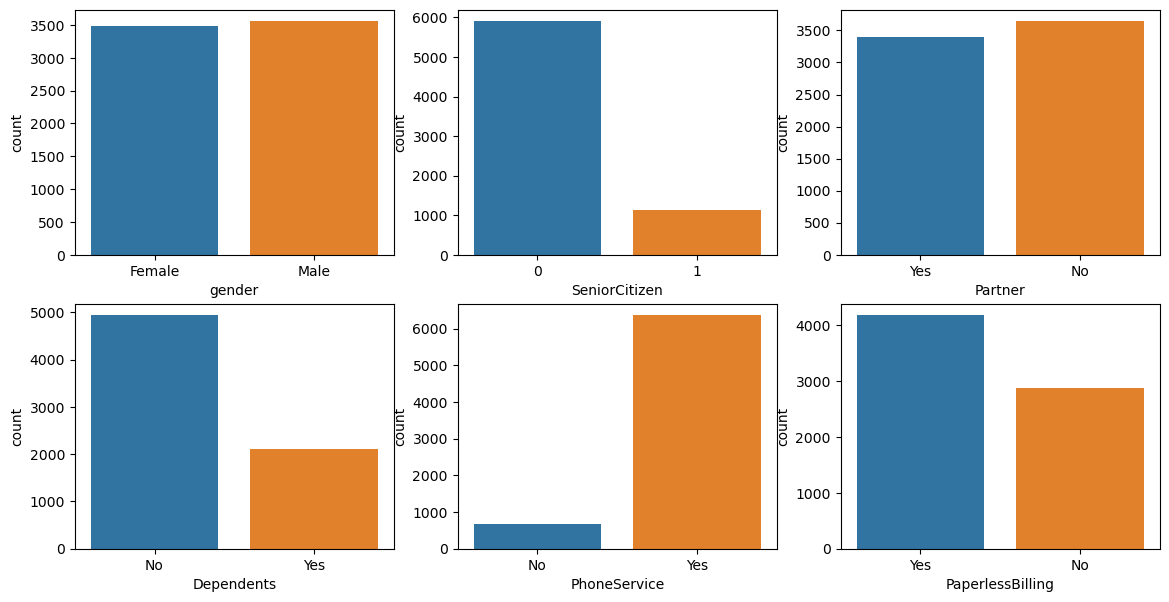

In [57]:
# 2 rows and 3 columns, xaxis = 14 units and yaxis = 7 units, with sharey false x and y axis are made independent
fig, axes=plt.subplots(2,3,figsize=(14,7),sharey=False)  
sns.countplot("gender",data=df,ax=axes[0,0])
sns.countplot("SeniorCitizen",data=df,ax=axes[0,1])
sns.countplot("Partner",data=df,ax=axes[0,2])
sns.countplot("Dependents",data=df,ax=axes[1,0])
sns.countplot("PhoneService",data=df,ax=axes[1,1])
sns.countplot("PaperlessBilling", data=df, ax=axes[1,2])

In [78]:
df1=df.copy() # backing up the df1 dataframe
df['Churn']=df['Churn'].map({'Yes':1,'No':0})  # mapping the values to No:0 and Yes:1
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


# Grouping into Males and Females and then finding the mean:

In [87]:
df[['gender','Churn']].groupby(['gender']).mean() # grouping into gender that is males and females and finding the mean

,Churn
gender,
Female,0.269209
Male,0.261603


In [88]:
df[['SeniorCitizen','Churn']].groupby(['SeniorCitizen']).mean() # grouping in the form SeniorCitizen

,Churn
SeniorCitizen,
0,0.236062
1,0.416813


In [89]:
df[['Partner','Churn']].groupby(['Partner']).mean() # grouping in the form of Partner

,Churn
Partner,
No,0.329580
Yes,0.196649


In [90]:
df[['PhoneService','Churn']].groupby(['PhoneService']).mean() # grouping in the form of Phoneservice

,Churn
PhoneService,
No,0.249267
Yes,0.267096


In [91]:
df[['PaperlessBilling','Churn']].groupby(['PaperlessBilling']).mean() # grouping in the form of PaperlessBilling

,Churn
PaperlessBilling,
No,0.163301
Yes,0.335651


In [97]:
table=pd.pivot_table(df,values='Churn',index=['gender'],columns=['SeniorCitizen'],aggfunc=np.mean)
# this is done to change 0 and 1 in terms of gender in SeniorCitizen column
table

SeniorCitizen,0,1
gender,,
Female,0.239384,0.422535
Male,0.232808,0.411150


C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='InternetService', ylabel='count'>

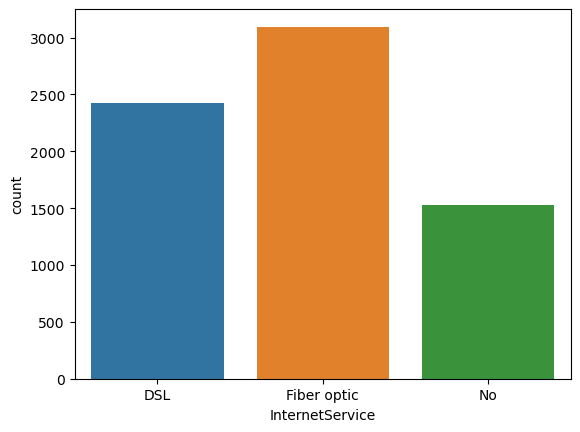

In [100]:
sns.countplot("InternetService",data=df)

In [101]:
df[['InternetService','Churn']].groupby(['InternetService']).mean() # grouping in the form of InterneService

,Churn
InternetService,
DSL,0.189591
Fiber optic,0.418928
No,0.074050


In [102]:
df[['InternetService','MonthlyCharges']].groupby(['InternetService']).mean() # grouping in the form of InterneService

,MonthlyCharges
InternetService,
DSL,58.102169
Fiber optic,91.500129
No,21.079194


C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rahul\anaconda3\lib\si

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

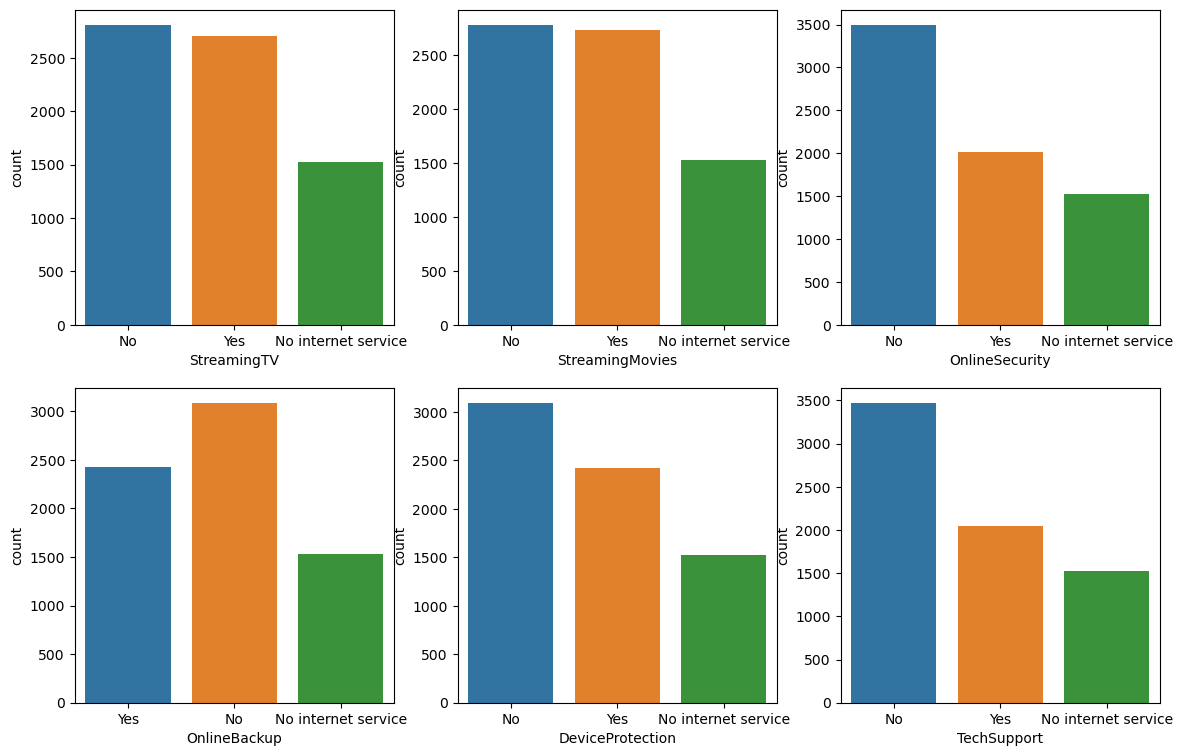

In [103]:
fig, axes=plt.subplots(2,3,figsize=(14,9))
sns.countplot("StreamingTV",data=df,ax=axes[0,0])
sns.countplot("StreamingMovies",data=df,ax=axes[0,1])
sns.countplot("OnlineSecurity",data=df,ax=axes[0,2])
sns.countplot("OnlineBackup",data=df,ax=axes[1,0])
sns.countplot("DeviceProtection",data=df,ax=axes[1,1])
sns.countplot("TechSupport",data=df,ax=axes[1,2])

In [105]:
df[['StreamingTV','Churn']].groupby(['StreamingTV']).mean()

,Churn
StreamingTV,
No,0.335231
No internet service,0.074050
Yes,0.300702


In [106]:
df[['StreamingMovies','Churn']].groupby(['StreamingMovies']).mean()

,Churn
StreamingMovies,
No,0.336804
No internet service,0.074050
Yes,0.299414


In [107]:
df[['OnlineSecurity','Churn']].groupby(['OnlineSecurity']).mean()

,Churn
OnlineSecurity,
No,0.417667
No internet service,0.074050
Yes,0.146112


In [108]:
df[['OnlineBackup','Churn']].groupby(['OnlineBackup']).mean()

,Churn
OnlineBackup,
No,0.399288
No internet service,0.074050
Yes,0.215315


In [111]:
df[['TechSupport','Churn']].groupby(['TechSupport']).mean()

,Churn
TechSupport,
No,0.416355
No internet service,0.074050
Yes,0.151663


In [112]:
df[['DeviceProtection','Churn']].groupby(['DeviceProtection']).mean()

,Churn
DeviceProtection,
No,0.391276
No internet service,0.074050
Yes,0.225021


In [113]:
df[['PhoneService','Churn']].groupby(['PhoneService']).mean()

,Churn
PhoneService,
No,0.249267
Yes,0.267096


In [114]:
df[['MultipleLines','Churn']].groupby(['MultipleLines']).mean()

,Churn
MultipleLines,
No,0.250442
No phone service,0.249267
Yes,0.286099


In [117]:
df[['Contract','Churn']].groupby(['Contract']).mean()

,Churn
Contract,
Month-to-month,0.427097
One year,0.112695
Two year,0.028319


In [139]:
df[['PaymentMethod','Churn']].groupby(['PaymentMethod']).mean()

,Churn
PaymentMethod,
Bank transfer (automatic),0.167098
Credit card (automatic),0.152431
Electronic check,0.452854
Mailed check,0.191067


In [144]:
df[['tenure','MonthlyCharges','Churn']].groupby('Churn').mean()

,tenure,MonthlyCharges
Churn,,
0,37.569965,61.265124
1,17.979133,74.441332


C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rahul\anaconda3\lib\si

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

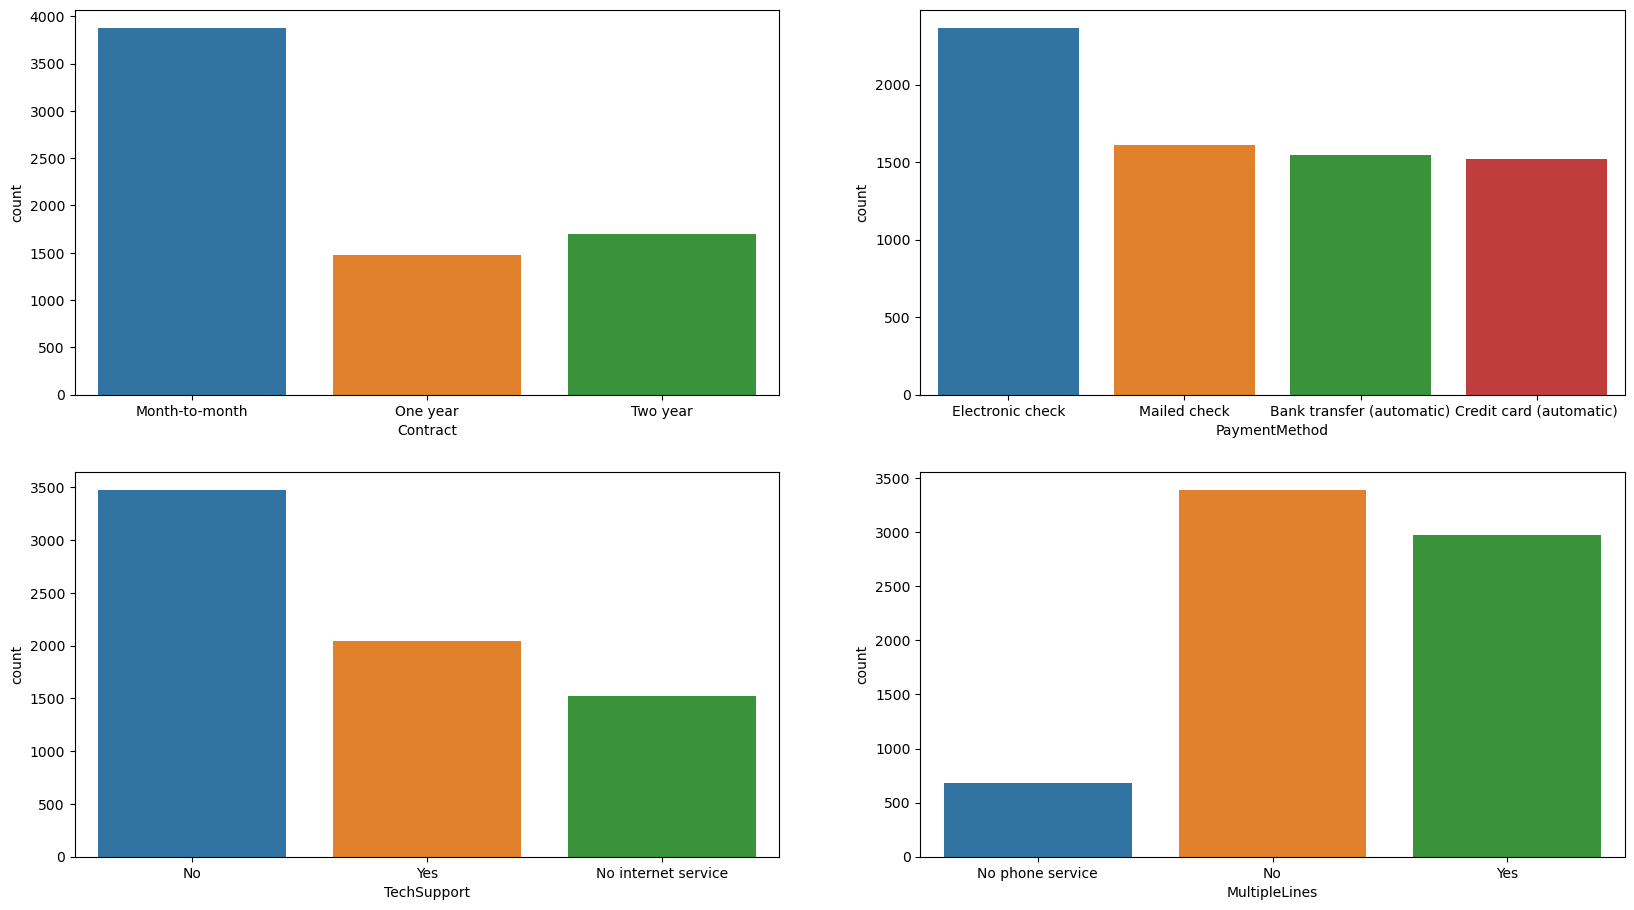

In [138]:
fig, axes=plt.subplots(2,2,figsize=(20,11),sharey=False)
sns.countplot("Contract",data=df,ax=axes[0,0])
sns.countplot("PaymentMethod",data=df,ax=axes[0,1])
sns.countplot("TechSupport",data=df,ax=axes[1,0])
sns.countplot("MultipleLines",data=df,ax=axes[1,1])

# Dropping some features due to no effect on dataset:

In [146]:
df.drop(['customerID','gender','PhoneService','Contract','TotalCharges'],axis=1,inplace=True)
#inplace function updates onto dataframe 'df'

# DATA PREPROCESSING:

In [147]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,MinMaxScaler

In [148]:
df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'Churn'],
      dtype='object')

# Encoding Categorical Variables: 

In [165]:
columns2=['SeniorCitizen','Partner','Dependents','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','PaymentMethod']

In [166]:
columns2

['SeniorCitizen',
 'Partner',
 'Dependents',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'PaymentMethod']

In [169]:
xvar=pd.get_dummies(df,columns=columns2,drop_first=True)  #dummy variable 'xvar'
xvar.shape

(7043, 26)

# Scaling Continuous Variables: 

In [171]:
sc=MinMaxScaler()
A=sc.fit_transform(df[['tenure']])
B=sc.fit_transform(df[['MonthlyCharges']])
xvar['tenure']=A
xvar['MonthlyCharges']=B

# Check Dimensions:

In [172]:
xvar.shape

(7043, 26)

# Resampling Process: 

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distribution before Resampling')

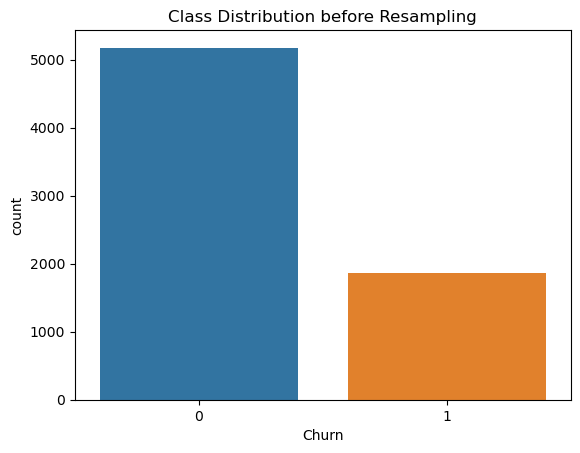

In [176]:
sns.countplot('Churn',data=df).set_title('Class Distribution before Resampling')

### Storing Churn=yes into a variable xvar_yes and Churn=no into xvar_no

In [177]:
xvar_yes=xvar[xvar.Churn==1]   #accessing from dummy variable xvar and storing into xvar_yes dataframe
xvar_no=xvar[xvar.Churn==0]   #accesing from dummy variable xvar and storing into xvar_no dataframe

# Upsampling (positive class):

In [182]:
xvar_yes_upsampled=xvar_yes.sample(n=len(xvar_no),replace=True,random_state=50)
# length of sampled of xvar_yes
len(xvar_yes_upsampled)  # length after upsampling
# note xvar is dummy variable, xvar_yes is churn yes distribution and xvar_yes_sampled is the sampled form 



5174

# Combining Positive and Negative Class Distribution:

C:\Users\rahul\AppData\Local\Temp\ipykernel_23144\256876462.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  xvar_upsampled=xvar_no.append(xvar_yes_upsampled).reset_index(drop=True)
C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distribution after Resampling')

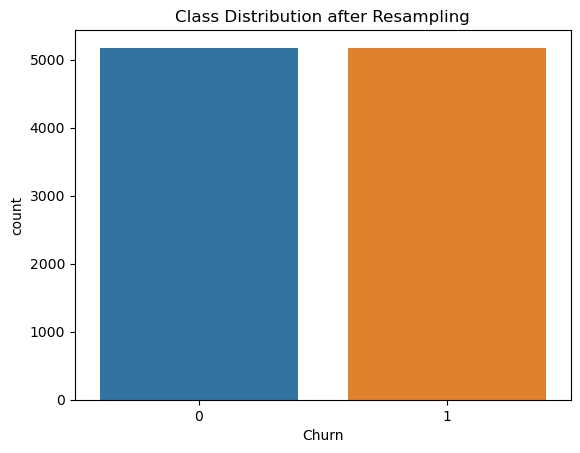

In [186]:
xvar_upsampled=xvar_no.append(xvar_yes_upsampled).reset_index(drop=True)
sns.countplot('Churn',data=xvar_upsampled).set_title('Class Distribution after Resampling')

# Model Creation:

In [189]:
from sklearn.model_selection import train_test_split as tts
x=xvar_upsampled.drop(['Churn'],axis=1)  # independent variable
y=xvar_upsampled['Churn']                # dependent variable

In [190]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.1,random_state=50)

# RidgeClassifier:

In [191]:
from sklearn.linear_model import RidgeClassifier 
from sklearn.metrics import accuracy_score 
ridge_var=RidgeClassifier()   # created an object ridge_var of type Ridge Classifier
ridge_var.fit(x_train,y_train)   # for the purpose of training the model using x_train and y_train

RidgeClassifier()

# Prediction_Train for RidgeClassifier:

In [192]:
rcprediction=ridge_var.predict(x_train)
accuracy_score(y_train,rcprediction)   # accuracy_score is a built-in function imported from sklearn -> metrics

0.7589391173628262

# Prediction_Test for RidgeClassifier:

In [193]:
rcprediction_test=ridge_var.predict(x_test)
accuracy_score(y_test,rcprediction_test)

0.7719806763285024

# RandomForest:

In [195]:
from sklearn.ensemble import RandomForestClassifier
forr_var=RandomForestClassifier(n_estimators=200,max_depth=10)   
forr_var.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=200)

In [197]:
rfprediction=forr_var.predict(x_train)
accuracy_score(y_train,rfprediction)

0.8808117684956512

In [198]:
rfprediction_test=forr_var.predict(x_test)
accuracy_score(y_test,rfprediction_test)

0.8492753623188406

# Model Improvement:

In [204]:
from sklearn.model_selection import GridSearchCV  # used for cross validation, an easy way of parameter tuning 

# it is done to try different parameters in selection of models

parameters={'n_estimators':[250,300,350,400],'max_depth':[15,20,25]}
rfc=RandomForestClassifier()
GSCV=GridSearchCV(estimator=rfc,param_grid=parameters,n_jobs=-1,cv=5)  
#n_jobs=-1 utilizes all CPU
#cv=5 refers to dataset folding to 5 number of folds and used to evaluate model's ability when given new data, 
# cv is done to estimate the performance of machine learning models
GSCV.fit(x,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [15, 20, 25],
                         'n_estimators': [250, 300, 350, 400]})

In [205]:
GSCV.best_params_

{'max_depth': 25, 'n_estimators': 350}

In [207]:
GSCV.best_score_  # it finds mean cross validation score of the best estimator that is '350'

0.8975657684288192

# End of the Project